In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages  # Import PdfPages

In [2]:
matched_words = {
'zero': ['zerowasteskincare', 'zerowastemakeup', 'zerowastecosmetics', 'zerowasteskincare', 'zerowasteliving', 'zerowaste', 'zerowastelifestyle', 'zerowaste', 'zerowastelifestyle', 'zerowastestore', 'zero', 'zerowasteskincare', 'zerowaste'],
'packag': ['packaging', 'packaging', 'packaging', 'packaging', 'packaging', 'packaging', 'packaging', 'packaging', 'packaging', 'packaging'],
'eco': ['eco', 'ecomindedchildhood', 'ecofriendlymakeup', 'ecobeauty', 'ecofriendly', 'ecofriendlyskincare', 'eco', 'economiacircular', 'ecofriendlyproducts', 'ecofriendlyliving', 'eco', 'eco'],
'refill': ['refillable', 'refillablemakeup', 'refillablecosmetics', 'refillableskincare', 'refillable', 'refillablebeauty', 'refill', 'refillrevolution', 'refillable', 'refillable', 'refill', 'refill', 'refill', 'refill', 'refillable', 'refill'],
'sustain': ['sustainablemakeup', 'sustainablebeauty', 'sustainableliving', 'sustainablelivingblog', 'sustainablelivingblogger', 'sustainable', 'sustainableskincare', 'sustainableskincare', 'sustainable', 'sustainable', 'sustainablepackaging', 'sustainablebrand', 'sustainableclothing', 'sustainablebusiness', 'sustainabilitymatters', 'sustainable', 'sustainable', 'sustainable', 'sustainability', 'sustainability'],
'vegan': ['veganbeauty', 'vegan', 'vegan'],
'plastic': ['plasticfree', 'plasticfree', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plasticfree'],
'cleanbeauty': ['cleanbeauty'],
'test': ['test', 'testimony'],
'waste': ['wastefree', 'waste', 'waste', 'wasted'],
'cruelty': ['crueltyfree', 'crueltyfreeskincare', 'cruelty', 'crueltyfree', 'crueltyfree'],
'organi': ['organicskincare', 'organiclipbalm', 'organicskincare'],
'fair': ['fairtradeskincare', 'fairtradeskincare', 'fairtradeskincare', 'fairtradeskincare', 'fairewholesale', 'fairly'],
'preservative': ['preservativefree', 'preservative'],
'ethic': ['ethicalcompany', 'ethicalskincare', 'ethical', 'ethical', 'ethical'],
'ingredient': ['ingredient', 'ingredient', 'ingredient', 'ingredient'],
'compos': ['compostableskincare', 'compostablelipbalm', 'compostable'],
'earth': ['earth', 'earthsustainable'],
'environ': ['environmentally', 'environment', 'environmental'],
'recycl': ['recycledmaterials', 'recycle'],
'circular': ['circularbeauty', 'circularity', 'circulardesign'],
'econom': ['economiacircular'],
'green': ['green'],
'reus': ['reuse', 'reusable', 'reuse', 'reuse', 'reuse', 'reusable', 'reuse', 'reuse'],
'fragrance': ['fragrance'],
'chemic': ['chemical'],
'safe': ['safe', 'safe', 'safe', 'safe'],
'health': ['health', 'health'],
'alternativ': ['alternative'],
'verif': ['verify'],

}
# Extract unique words
unique_words = set()
for words in matched_words.values():
    unique_words.update(words)  # Add all words to the set (removes duplicates)

# Convert back to a list 
unique_words_list = sorted(unique_words)  #  sorting for readability

# Output the unique words
print(unique_words_list)

['alternative', 'chemical', 'circularbeauty', 'circulardesign', 'circularity', 'cleanbeauty', 'compostable', 'compostablelipbalm', 'compostableskincare', 'cruelty', 'crueltyfree', 'crueltyfreeskincare', 'earth', 'earthsustainable', 'eco', 'ecobeauty', 'ecofriendly', 'ecofriendlyliving', 'ecofriendlymakeup', 'ecofriendlyproducts', 'ecofriendlyskincare', 'ecomindedchildhood', 'economiacircular', 'environment', 'environmental', 'environmentally', 'ethical', 'ethicalcompany', 'ethicalskincare', 'fairewholesale', 'fairly', 'fairtradeskincare', 'fragrance', 'green', 'health', 'ingredient', 'organiclipbalm', 'organicskincare', 'packaging', 'plastic', 'plasticfree', 'preservative', 'preservativefree', 'recycle', 'recycledmaterials', 'refill', 'refillable', 'refillablebeauty', 'refillablecosmetics', 'refillablemakeup', 'refillableskincare', 'refillrevolution', 'reusable', 'reuse', 'safe', 'sustainability', 'sustainabilitymatters', 'sustainable', 'sustainablebeauty', 'sustainablebrand', 'sustain

          Keyword  Average Sentiment
45     fragranced          -0.500000
82  earthfriendly          -0.500000
73          biore          -0.350000
38         fossil          -0.305556
90        illegal          -0.300000
..            ...                ...
5            fair           0.471429
96        license           0.500000
21        biochem           0.500000
66         planet           0.529762
16       licensed           1.000000

[120 rows x 2 columns]


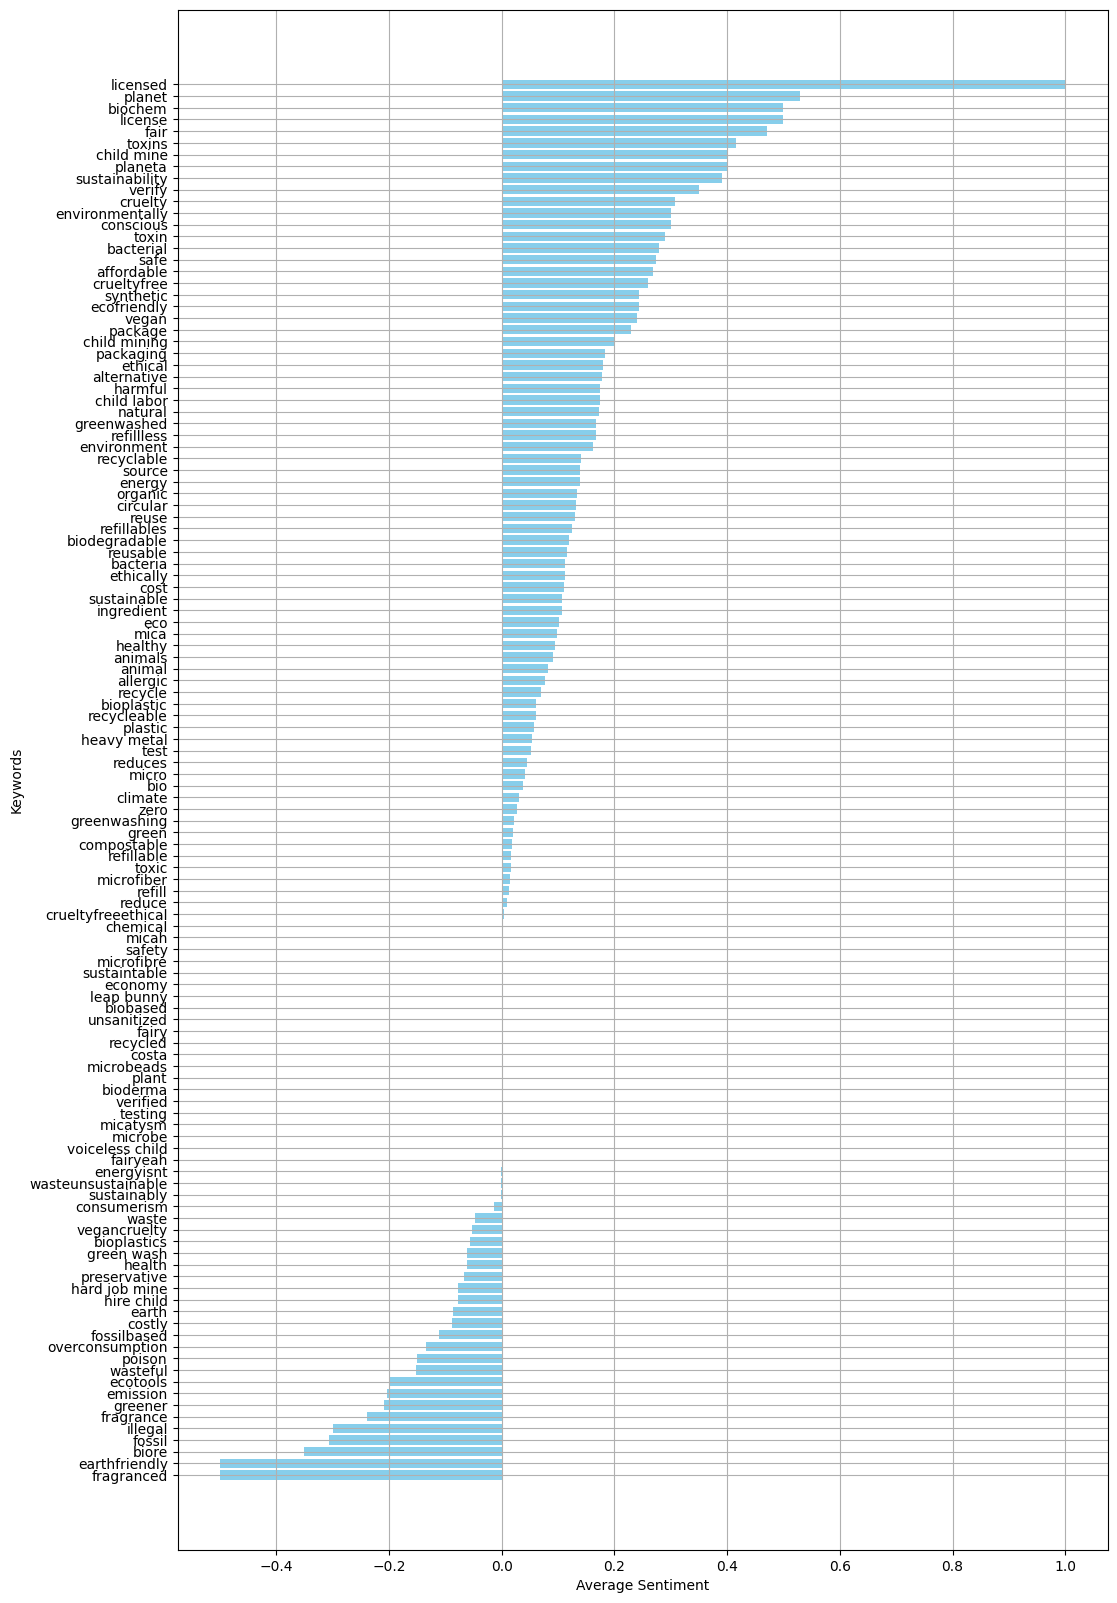

PDF file with the results and plot has been created successfully.


In [2]:

# Ensure that nltk 'punkt' tokenizer is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_TikTok_comments3.csv')[['Lemmatized_Comments']]


# Define keywords
keywords = [
    'ethical', 'green', 'zero', 'organic', 'microfiber', 'fair', 'testing', 'allergic', 'harmful', 
    'synthetic', 'green wash', 'health', 'environment', 'vegan', 'toxins', 'wasteful', 'licensed', 
    'healthy', 'energyisnt', 'recycle', 'alternative', 'biochem', 'greenwashed', 'environmentally', 
    'ecofriendly', 'vegancruelty', 'micatysm', 'animal', 'greenwashing', 'sustainably', 'sustainable', 
    'compostable', 'bacterial', 'bio', 'fossilbased', 'refill', 'ecotools', 'costly', 'fossil', 
    'microbe', 'recycled', 'costa', 'fairyeah', 'fairy', 'cruelty', 'fragranced', 'sustainability', 
    'refillables', 'bioplastics', 'refillless', 'energy', 'plant', 'wasteunsustainable', 'chemical', 
    'toxic', 'cost', 'test', 'climate', 'packaging', 'source', 'voiceless child', 'microbeads', 
    'toxin', 'crueltyfreeethical', 'bacteria', 'circular', 'planet', 'fragrance', 'conscious', 
    'verified', 'safe', 'ingredient', 'child mining', 'biore', 'consumerism', 'bioplastic', 
    'refillable', 'animals', 'micro', 'recycleable', 'economy', 'overconsumption', 'earthfriendly', 
    'reusable', 'plastic', 'bioderma', 'earth', 'child mine', 'reduce', 'ethically', 'illegal', 
    'greener', 'preservative', 'waste', 'verify', 'hard job mine', 'license', 'recyclable', 
    'package', 'crueltyfree', 'heavy metal', 'affordable', 'sustaintable', 'eco', 'hire child', 
    'planeta', 'microfibre', 'unsanitized', 'micah', 'mica', 'poison', 'safety', 'natural', 
    'child labor', 'emission', 'biodegradable', 'reuse', 'reduces', 'leap bunny', 'biobased'
]

# Initialize a dictionary to store results
keyword_sentiments = {keyword: [] for keyword in keywords}

# Function to find keyword in Processed_Caption and analyze sentiment
def analyze_comments_sentiments(comments):
    blob = TextBlob(comments)
    for keyword in keywords:
        if keyword in comments.lower():  # Check if the keyword is in the commennts
            keyword_sentiments[keyword].append(blob.sentiment.polarity)  # Add the sentiment score of the entire comments

# Apply the function to each Processed_Comments
df['Lemmatized_Comments'].apply(analyze_comments_sentiments)

# Prepare data for the table and visualization
data_for_table = []
for keyword, sentiments in keyword_sentiments.items():
    average_sentiment = sum(sentiments) / len(sentiments) if sentiments else None
    data_for_table.append({'Keyword': keyword, 'Average Sentiment': average_sentiment})

# Create DataFrame from the list
results_df = pd.DataFrame(data_for_table)

# Sort the DataFrame by 'Average Sentiment' in ascending order
results_df = results_df.sort_values(by='Average Sentiment', ascending=True)
print(results_df)

# Save the DataFrame to a CSV file
results_df.to_csv('keyword_sentiment_results_TikTok.csv', index=False)

# Plotting
plt.figure(figsize=(12, 20))
results_df = results_df.dropna()  # Remove keywords with no data
plt.barh(results_df['Keyword'], results_df['Average Sentiment'], color='skyblue')
plt.xlabel('Average Sentiment')
plt.ylabel('Keywords')
#plt.title('Average Sentiment for Keywords')
plt.grid(True)

# Save the plot to a PDF file with no white border
plt.savefig('keyword_sentiment_plot.pdf', bbox_inches='tight', pad_inches=0)

plt.show()

# Save the DataFrame and plot to a PDF
with PdfPages('keyword_sentiment_results_tiktok.pdf') as pdf:
    # Save the table as a figure
    fig, ax = plt.subplots(figsize=(10, 15))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(results_df.columns))))
    pdf.savefig(fig)
    plt.close()
    
    # Save the plot as a figure
    plt.figure(figsize=(12, 20))
    results_df = results_df.dropna()  # Remove keywords with no data
    plt.barh(results_df['Keyword'], results_df['Average Sentiment'], color='skyblue')
    plt.xlabel('Sustainable keywords Average Sentiment TikTok')
    plt.ylabel('Keywords')
    plt.grid(True)
    pdf.savefig(bbox_inches='tight', pad_inches=0)
    plt.close()

print("PDF file with the results and plot has been created successfully.")



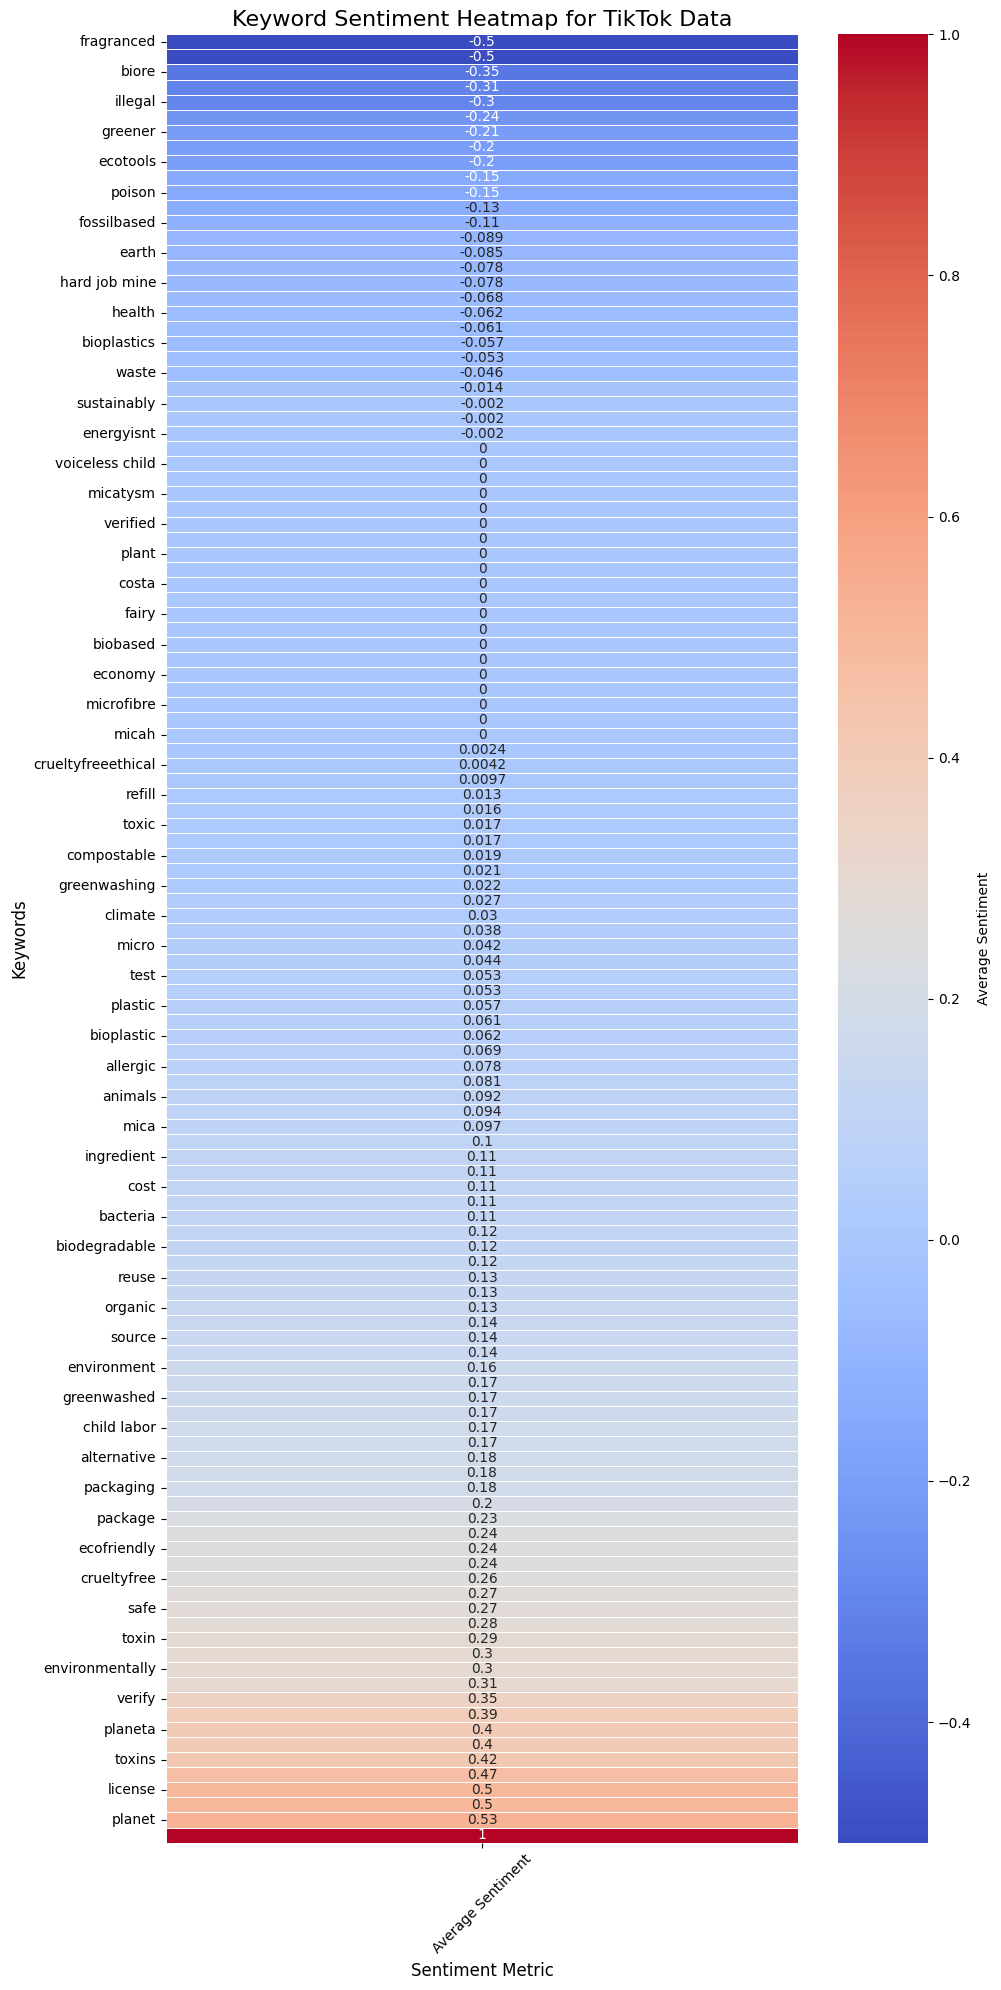

PDF file with the heatmap and other results has been created successfully.


In [4]:
import seaborn as sns



# Reshape the DataFrame for heatmap
heatmap_data = results_df.set_index('Keyword').dropna()

# Create the heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(
    heatmap_data,
    annot=True,  # Annotate cells with average sentiment values
    cmap="coolwarm",  # Color map to show sentiment polarity
    cbar_kws={'label': 'Average Sentiment'},  # Colorbar label
    linewidths=0.5  # Line width between cells
)

# Add titles and labels
plt.title("Keyword Sentiment Heatmap for TikTok Data", fontsize=16)
plt.xlabel("Sentiment Metric", fontsize=12)  # Change if needed
plt.ylabel("Keywords", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap
plt.savefig("keyword_sentiment_heatmap_tiktok.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the heatmap to the PDF along with the other results
with PdfPages('keyword_sentiment_results_tiktok.pdf') as pdf:
    # Save the existing bar chart and table
    pdf.savefig(fig)  # Add the results table
    
    # Save the heatmap as a page in the PDF
    plt.figure(figsize=(10, 20))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap="coolwarm",
        cbar_kws={'label': 'Average Sentiment'},
        linewidths=0.5
    )
    plt.title("Keyword Sentiment Heatmap for TikTok Data", fontsize=16)
    plt.xlabel("Sentiment Metric", fontsize=12)
    plt.ylabel("Keywords", fontsize=12)
    plt.tight_layout()
    pdf.savefig(bbox_inches='tight')
    plt.close()

print("PDF file with the heatmap and other results has been created successfully.")


           Keyword  Average Sentiment
53        chemical          -0.200000
109           mica          -0.200000
83        reusable          -0.116667
57         climate          -0.009028
88          reduce           0.000000
..             ...                ...
113    child labor                NaN
114       emission                NaN
115  biodegradable                NaN
117        reduces                NaN
119       biobased                NaN

[120 rows x 2 columns]


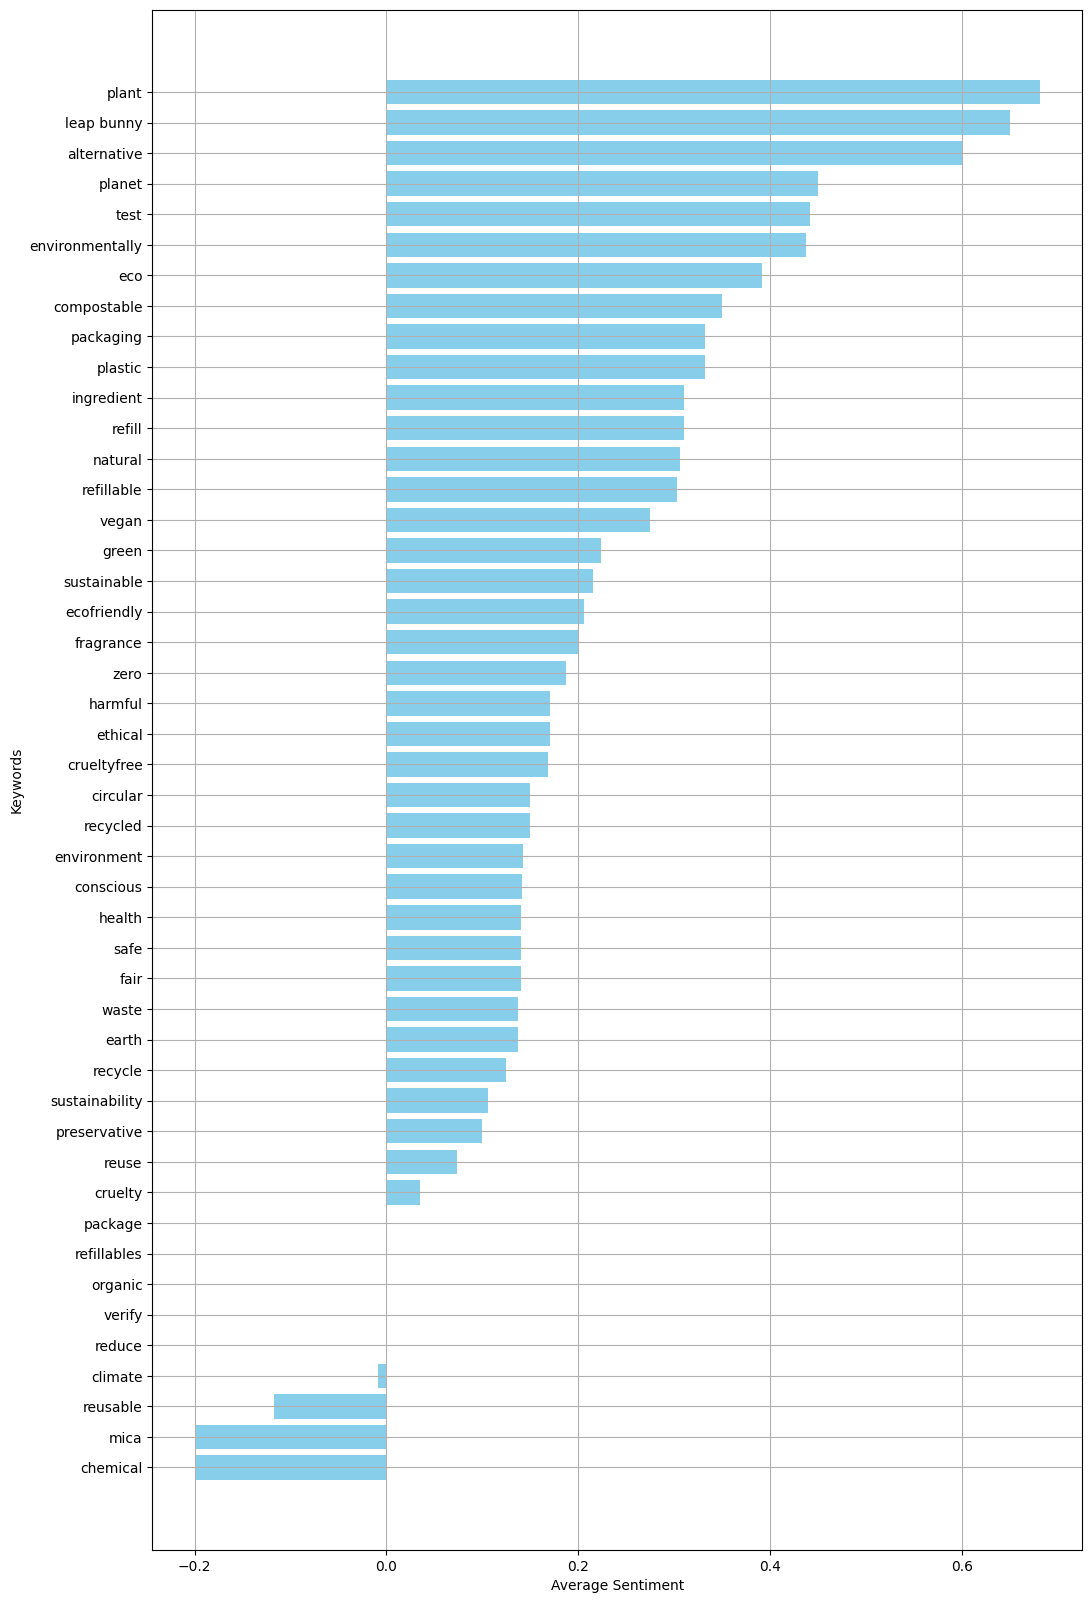

PDF file with the results and plot has been created successfully.


In [7]:
#Instagram

# Ensure that nltk 'punkt' tokenizer is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_Instagram-comments3.csv')[['Lemmatized_Comments']]


# Define keywords
keywords = [
    'ethical', 'green', 'zero', 'organic', 'microfiber', 'fair', 'testing', 'allergic', 'harmful', 
    'synthetic', 'green wash', 'health', 'environment', 'vegan', 'toxins', 'wasteful', 'licensed', 
    'healthy', 'energyisnt', 'recycle', 'alternative', 'biochem', 'greenwashed', 'environmentally', 
    'ecofriendly', 'vegancruelty', 'micatysm', 'animal', 'greenwashing', 'sustainably', 'sustainable', 
    'compostable', 'bacterial', 'bio', 'fossilbased', 'refill', 'ecotools', 'costly', 'fossil', 
    'microbe', 'recycled', 'costa', 'fairyeah', 'fairy', 'cruelty', 'fragranced', 'sustainability', 
    'refillables', 'bioplastics', 'refillless', 'energy', 'plant', 'wasteunsustainable', 'chemical', 
    'toxic', 'cost', 'test', 'climate', 'packaging', 'source', 'voiceless child', 'microbeads', 
    'toxin', 'crueltyfreeethical', 'bacteria', 'circular', 'planet', 'fragrance', 'conscious', 
    'verified', 'safe', 'ingredient', 'child mining', 'biore', 'consumerism', 'bioplastic', 
    'refillable', 'animals', 'micro', 'recycleable', 'economy', 'overconsumption', 'earthfriendly', 
    'reusable', 'plastic', 'bioderma', 'earth', 'child mine', 'reduce', 'ethically', 'illegal', 
    'greener', 'preservative', 'waste', 'verify', 'hard job mine', 'license', 'recyclable', 
    'package', 'crueltyfree', 'heavy metal', 'affordable', 'sustaintable', 'eco', 'hire child', 
    'planeta', 'microfibre', 'unsanitized', 'micah', 'mica', 'poison', 'safety', 'natural', 
    'child labor', 'emission', 'biodegradable', 'reuse', 'reduces', 'leap bunny', 'biobased'
]

# Initialize a dictionary to store results
keyword_sentiments = {keyword: [] for keyword in keywords}

# Function to find keyword in Processed_Comments and analyze sentiment
def analyze_comments_sentiments(comments):
    blob = TextBlob(comments)
    for keyword in keywords:
        if keyword in comments.lower():  # Check if the keyword is in the Comments
            keyword_sentiments[keyword].append(blob.sentiment.polarity)  # Add the sentiment score of the entire Comments

# Apply the function to each Processed_Comments
df['Lemmatized_Comments'].apply(analyze_comments_sentiments)

# Prepare data for the table and visualization
data_for_table = []
for keyword, sentiments in keyword_sentiments.items():
    average_sentiment = sum(sentiments) / len(sentiments) if sentiments else None
    data_for_table.append({'Keyword': keyword, 'Average Sentiment': average_sentiment})

# Create DataFrame from the list
results_df = pd.DataFrame(data_for_table)

# Sort the DataFrame by 'Average Sentiment' in ascending order
results_df = results_df.sort_values(by='Average Sentiment', ascending=True)
print(results_df)

# Save the DataFrame to a CSV file
results_df.to_csv('keyword_sentiment_results_insta.csv', index=False)

# Plotting
plt.figure(figsize=(12, 20))
results_df = results_df.dropna()  # Remove keywords with no data
plt.barh(results_df['Keyword'], results_df['Average Sentiment'], color='skyblue')
plt.xlabel('Average Sentiment')
plt.ylabel('Keywords')
#plt.title('Average Sentiment for Keywords')
plt.grid(True)

# Save the plot to a PDF file with no white border
plt.savefig('keyword_sentiment_plot.pdf', bbox_inches='tight', pad_inches=0)

plt.show()

# Save the DataFrame and plot to a PDF
with PdfPages('keyword_sentiment_results_insta.pdf') as pdf:
    # Save the table as a figure
    fig, ax = plt.subplots(figsize=(10, 12))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(results_df.columns))))
    pdf.savefig(fig)
    plt.close()
    
    # Save the plot as a figure
    plt.figure(figsize=(12, 20))
    results_df = results_df.dropna()  # Remove keywords with no data
    plt.barh(results_df['Keyword'], results_df['Average Sentiment'], color='skyblue')
    plt.xlabel('Sustainable keywords Average Sentiment Instagram')
    plt.ylabel('Keywords')
    plt.grid(True)
    pdf.savefig(bbox_inches='tight', pad_inches=0)
    plt.close()

print("PDF file with the results and plot has been created successfully.")



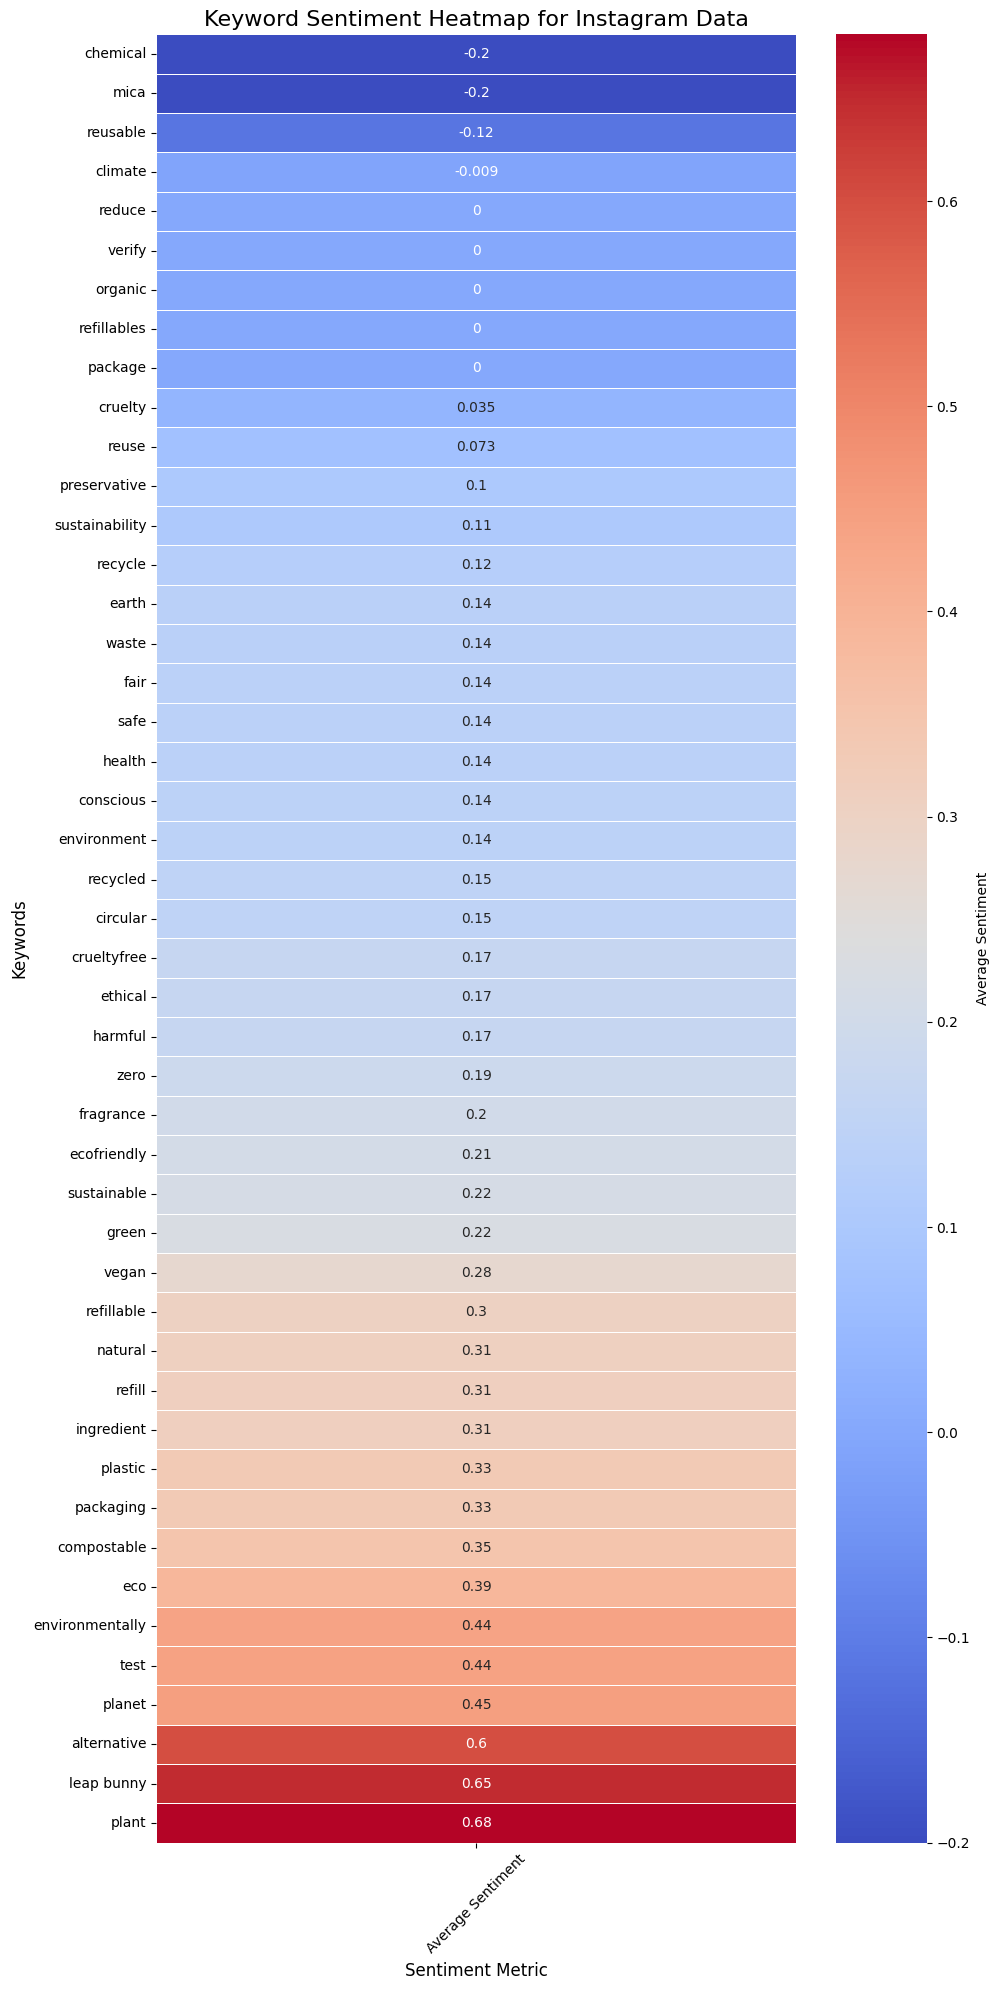

PDF file with the heatmap and other results has been created successfully.


In [11]:
import seaborn as sns



# Reshape the DataFrame for heatmap
heatmap_data = results_df.set_index('Keyword').dropna()

# Create the heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(
    heatmap_data,
    annot=True,  # Annotate cells with average sentiment values
    cmap="coolwarm",  # Color map to show sentiment polarity
    cbar_kws={'label': 'Average Sentiment'},  # Colorbar label
    linewidths=0.5  # Line width between cells
)

# Add titles and labels
plt.title("Keyword Sentiment Heatmap for Instagram Data", fontsize=16)
plt.xlabel("Sentiment Metric", fontsize=12)  # Change if needed
plt.ylabel("Keywords", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap
plt.savefig("keyword_sentiment_heatmap_Instagram.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the heatmap to the PDF along with the other results
with PdfPages('keyword_sentiment_results_Instagram.pdf') as pdf:
    # Save the existing bar chart and table
    pdf.savefig(fig)  # Add the results table
    
    # Save the heatmap as a page in the PDF
    plt.figure(figsize=(10, 20))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap="coolwarm",
        cbar_kws={'label': 'Average Sentiment'},
        linewidths=0.5
    )
    plt.title("Keyword Sentiment Heatmap for Instagram Data", fontsize=16)
    plt.xlabel("Sentiment Metric", fontsize=12)
    plt.ylabel("Keywords", fontsize=12)
    plt.tight_layout()
    pdf.savefig(bbox_inches='tight')
    plt.close()

print("PDF file with the heatmap and other results has been created successfully.")
